<a href="https://colab.research.google.com/github/koborishun/shun-finance/blob/develop/TA_lib_macd%E6%8F%8F%E7%94%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   1835      0 --:--:-- --:--:-- --:--:--  1835
100   355  100   355    0     0    788      0 --:--:-- --:--:-- --:--:--   788
100 1299k  100 1299k    0     0  1479k      0 --:--:-- --:--:-- --:--:-- 3539k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

In [ ]:
!pip install yahoo_finance_api2

  Created wheel for yahoo-finance-api2: filename=yahoo_finance_api2-0.0.12-py3-none-any.whl size=3731 sha256=ee20b78dd7b1acdeca346073d33248a82e549d4b28005be70cb31fb594b4cfd1
  Stored in directory: /root/.cache/pip/wheels/df/83/e1/df62dc96545acda58900be732f6eca5f34c84f28c9bd882f75
Successfully built yahoo-finance-api2


In [ ]:
!pip install mplfinance

     |████████████████████████████████| 70 kB 2.5 MB/s 


In [ ]:
import talib as ta
from yahoo_finance_api2 import share
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# TDKの株価を取得
my_share = share.Share('6762.T')
ohlcv = my_share.get_historical(
    share.PERIOD_TYPE_YEAR, 1,
    share.FREQUENCY_TYPE_DAY, 1)
df = pd.DataFrame(ohlcv)
# unix時間をtimestampに変換
df['timestamp'] = pd.to_datetime(df['timestamp'].astype(int), unit='ms')
df.set_index("timestamp", inplace=True)
df

,open,high,low,close,volume
timestamp,,,,,
2021-02-19,5353.333496,5403.333496,5333.333496,5400.000000,2068500
2021-02-22,5420.000000,5460.000000,5366.666504,5420.000000,2018700
2021-02-24,5316.666504,5363.333496,5223.333496,5226.666504,2714100
2021-02-25,5333.333496,5373.333496,5306.666504,5350.000000,2114400
2021-02-26,5163.333496,5216.666504,5080.000000,5080.000000,3024300
...,...,...,...,...,...
2022-02-14,4515.000000,4555.000000,4485.000000,4505.000000,2318200
2022-02-15,4540.000000,4560.000000,4460.000000,4510.000000,1389400
2022-02-16,4665.000000,4780.000000,4655.000000,4740.000000,2824100


In [ ]:
##ここからmacdを計算していく
close=df['close']

##ta-libでmacd計算
macd, macdsignal, macdhist = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)

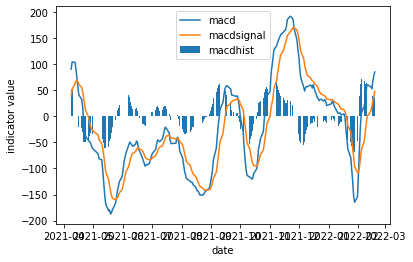

In [ ]:
plt.plot(macd,label='macd')
plt.plot(macdsignal,label='macdsignal')
plt.bar(macdhist.index,macdhist ,label='macdhist')
plt.xlabel('date')
plt.ylabel('indicator value')
plt.legend()
plt.show()